<a href="https://colab.research.google.com/github/chimata-pavankumar-yadav/ML_assignment/blob/main/ML_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Testing criterion: gini
Accuracy: 0.76
              precision    recall  f1-score   support

           0       0.77      0.85      0.81       125
           1       0.73      0.62      0.67        84

    accuracy                           0.76       209
   macro avg       0.75      0.73      0.74       209
weighted avg       0.75      0.76      0.75       209

Testing criterion: entropy
Accuracy: 0.78
              precision    recall  f1-score   support

           0       0.78      0.87      0.83       125
           1       0.77      0.64      0.70        84

    accuracy                           0.78       209
   macro avg       0.78      0.76      0.76       209
weighted avg       0.78      0.78      0.78       209



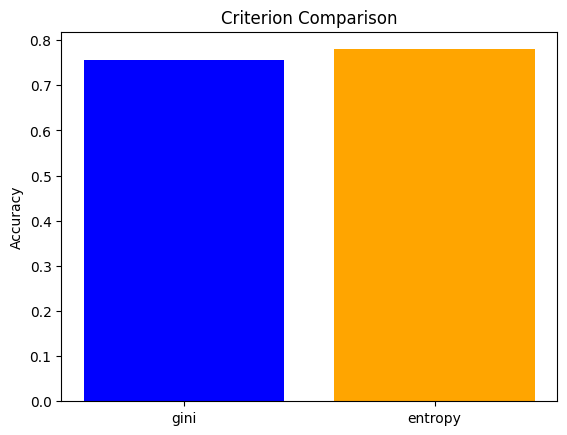

Testing max_depth: 3
Accuracy: 0.80
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       125
           1       0.80      0.67      0.73        84

    accuracy                           0.80       209
   macro avg       0.80      0.78      0.78       209
weighted avg       0.80      0.80      0.80       209

Testing max_depth: 5
Accuracy: 0.77
              precision    recall  f1-score   support

           0       0.76      0.90      0.82       125
           1       0.79      0.58      0.67        84

    accuracy                           0.77       209
   macro avg       0.78      0.74      0.75       209
weighted avg       0.77      0.77      0.76       209

Testing max_depth: 10
Accuracy: 0.78
              precision    recall  f1-score   support

           0       0.77      0.88      0.82       125
           1       0.78      0.62      0.69        84

    accuracy                           0.78       209
   macro avg       

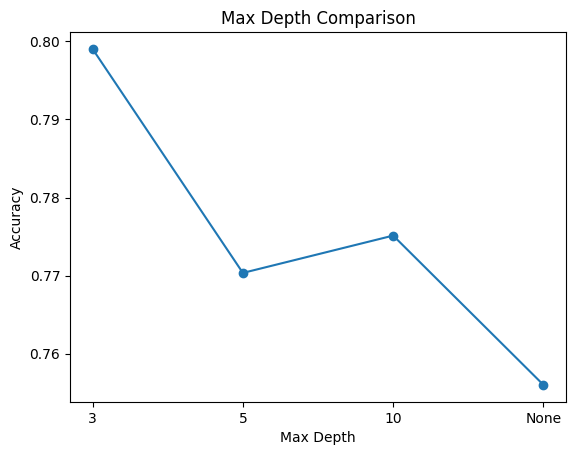

Testing min_samples_split: 2
Accuracy: 0.76
              precision    recall  f1-score   support

           0       0.77      0.85      0.81       125
           1       0.73      0.62      0.67        84

    accuracy                           0.76       209
   macro avg       0.75      0.73      0.74       209
weighted avg       0.75      0.76      0.75       209

Testing min_samples_split: 5
Accuracy: 0.75
              precision    recall  f1-score   support

           0       0.77      0.84      0.80       125
           1       0.72      0.62      0.67        84

    accuracy                           0.75       209
   macro avg       0.74      0.73      0.73       209
weighted avg       0.75      0.75      0.75       209

Testing min_samples_split: 10
Accuracy: 0.75
              precision    recall  f1-score   support

           0       0.77      0.82      0.80       125
           1       0.71      0.64      0.68        84

    accuracy                           0.75      

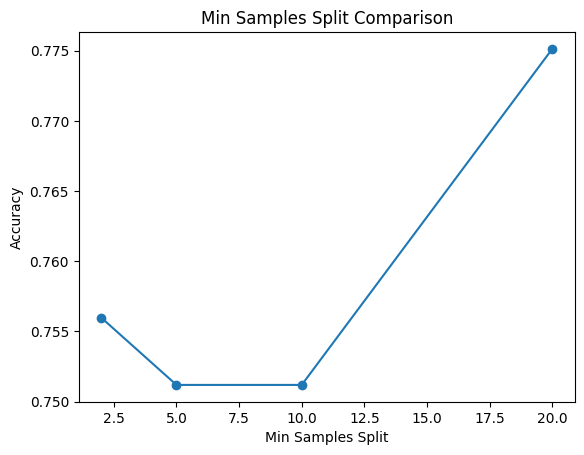

Testing min_samples_leaf: 1
Accuracy: 0.76
              precision    recall  f1-score   support

           0       0.77      0.85      0.81       125
           1       0.73      0.62      0.67        84

    accuracy                           0.76       209
   macro avg       0.75      0.73      0.74       209
weighted avg       0.75      0.76      0.75       209

Testing min_samples_leaf: 5
Accuracy: 0.74
              precision    recall  f1-score   support

           0       0.76      0.84      0.80       125
           1       0.71      0.60      0.65        84

    accuracy                           0.74       209
   macro avg       0.73      0.72      0.72       209
weighted avg       0.74      0.74      0.74       209

Testing min_samples_leaf: 10
Accuracy: 0.76
              precision    recall  f1-score   support

           0       0.76      0.88      0.81       125
           1       0.77      0.58      0.66        84

    accuracy                           0.76       20

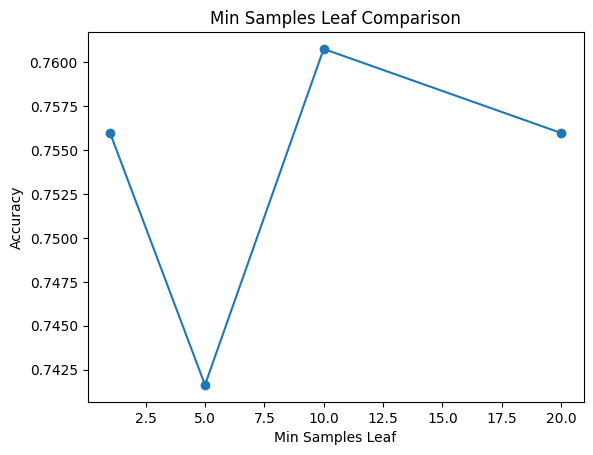

Testing max_leaf_nodes: 5
Accuracy: 0.78
              precision    recall  f1-score   support

           0       0.74      0.97      0.84       125
           1       0.91      0.50      0.65        84

    accuracy                           0.78       209
   macro avg       0.83      0.73      0.74       209
weighted avg       0.81      0.78      0.76       209

Testing max_leaf_nodes: 10
Accuracy: 0.77
              precision    recall  f1-score   support

           0       0.74      0.94      0.83       125
           1       0.86      0.51      0.64        84

    accuracy                           0.77       209
   macro avg       0.80      0.73      0.74       209
weighted avg       0.79      0.77      0.75       209

Testing max_leaf_nodes: 20
Accuracy: 0.78
              precision    recall  f1-score   support

           0       0.78      0.87      0.82       125
           1       0.77      0.63      0.69        84

    accuracy                           0.78       209
   

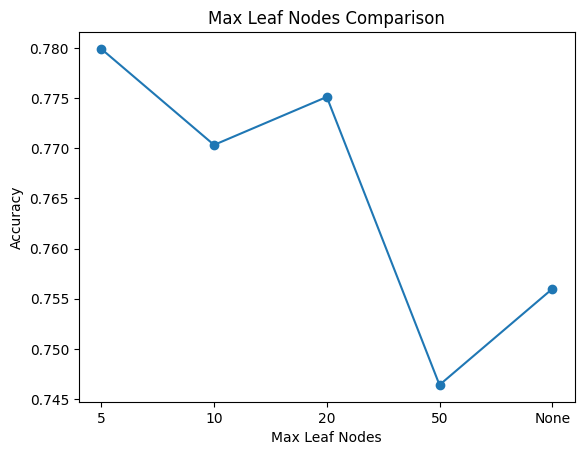

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Step 1: Load Titanic dataset
# This dataset is available from scikit-learn's OpenML repository
from sklearn.datasets import fetch_openml
data = fetch_openml(name='titanic', version=1, as_frame=True)
df = data.frame

# Step 2: Data preprocessing
# Selecting relevant features and droping rows which have missing values
df = df[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'survived']].dropna()

# Encode categorical variables
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['embarked'] = df['embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# Split data into features (X) and target (y)
X = df.drop(columns='survived')
y = df['survived']

# Split into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Define a function to evaluate the model
def evaluate_model(model):
    """
    Trains a model, makes predictions, and calculates accuracy and other metrics.
    """
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.2f}")
    print(classification_report(y_test, y_pred))
    return acc

# Step 4: Analyze 'criterion' hyperparameter
criteria = ['gini', 'entropy']
results_criterion = []

for crit in criteria:
    print(f"Testing criterion: {crit}")
    tree = DecisionTreeClassifier(criterion=crit, random_state=42)
    acc = evaluate_model(tree)
    results_criterion.append((crit, acc))

# Plot criterion results
plt.bar([x[0] for x in results_criterion], [x[1] for x in results_criterion], color=['blue', 'orange'])
plt.title("Criterion Comparison")
plt.ylabel("Accuracy")
plt.show()

# Step 5: Analyze 'max_depth' hyperparameter
depths = [3, 5, 10, None]
results_depth = []

for depth in depths:
    print(f"Testing max_depth: {depth}")
    tree = DecisionTreeClassifier(max_depth=depth, random_state=42)
    acc = evaluate_model(tree)
    results_depth.append((depth, acc))

# Plot max_depth results
depth_labels = [str(d) if d is not None else "None" for d in depths]
plt.plot(depth_labels, [x[1] for x in results_depth], marker='o')
plt.title("Max Depth Comparison")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.show()

# Step 6: Analyze 'min_samples_split' hyperparameter
splits = [2, 5, 10, 20]
results_split = []

for split in splits:
    print(f"Testing min_samples_split: {split}")
    tree = DecisionTreeClassifier(min_samples_split=split, random_state=42)
    acc = evaluate_model(tree)
    results_split.append((split, acc))

# Plot min_samples_split results
plt.plot(splits, [x[1] for x in results_split], marker='o')
plt.title("Min Samples Split Comparison")
plt.xlabel("Min Samples Split")
plt.ylabel("Accuracy")
plt.show()

# Step 7: Analyze 'min_samples_leaf' hyperparameter
leaf_sizes = [1, 5, 10, 20]
results_leaf = []

for leaf in leaf_sizes:
    print(f"Testing min_samples_leaf: {leaf}")
    tree = DecisionTreeClassifier(min_samples_leaf=leaf, random_state=42)
    acc = evaluate_model(tree)
    results_leaf.append((leaf, acc))

# Plot min_samples_leaf results
plt.plot(leaf_sizes, [x[1] for x in results_leaf], marker='o')
plt.title("Min Samples Leaf Comparison")
plt.xlabel("Min Samples Leaf")
plt.ylabel("Accuracy")
plt.show()

# Step 8: Analyze 'max_leaf_nodes' hyperparameter
leaf_nodes = [5, 10, 20, 50, None]  # Test a range of values including no limit
results_max_leaf_nodes = []

for nodes in leaf_nodes:
    print(f"Testing max_leaf_nodes: {nodes}")
    tree = DecisionTreeClassifier(max_leaf_nodes=nodes, random_state=42)
    acc = evaluate_model(tree)
    results_max_leaf_nodes.append((nodes, acc))

# Plot max_leaf_nodes results
node_labels = [str(n) if n is not None else "None" for n in leaf_nodes]
plt.plot(node_labels, [x[1] for x in results_max_leaf_nodes], marker='o')
plt.title("Max Leaf Nodes Comparison")
plt.xlabel("Max Leaf Nodes")
plt.ylabel("Accuracy")
plt.show()




In [5]:
# Step 8: Combine the best hyperparameters
best_params = {
    'criterion': 'entropy',  # Update based on the best results
    'max_depth': 3,       # Update based on the best results
    'min_samples_split': 20,  # Update based on the best results
    'min_samples_leaf': 10,
     # Update based on the best results
}

print("Evaluating final model with best hyperparameters...")
final_tree = DecisionTreeClassifier(**best_params, random_state=42)
final_acc = evaluate_model(final_tree)
print(f"Final Model Accuracy with Best Hyperparameters: {final_acc:.2f}")

Evaluating final model with best hyperparameters...
Accuracy: 0.80
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       125
           1       0.80      0.67      0.73        84

    accuracy                           0.80       209
   macro avg       0.80      0.78      0.78       209
weighted avg       0.80      0.80      0.80       209

Final Model Accuracy with Best Hyperparameters: 0.80
